### 제주도 vehicle 데이터를 exponential로 예측 

In [51]:
import pandas as pd

In [52]:
tr = pd.read_excel("./data/project/train_j_r.xlsx", parse_date = ['actual'])
test = pd.read_excel("./data/project/test_j.xlsx", parse_date = ['actual'])

In [54]:
tr.head()

,year,actual,EV,vehicle_total,charging station
0,1,2014,674,384117,NaN
1,2,2015,2369,435015,NaN
2,3,2016,5629,467243,NaN
3,4,2017,9206,500197,7272.0
4,5,2018,15549,553578,NaN


In [17]:
print(tr.columns)
print(test.columns)
tr.head(5)
tr.info(); test.info()

Index(['year', 'actual', 'EV', 'vehicle_total', 'charging station'], dtype='object')
Index(['year', 'actual', 'vehicle'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
year                68 non-null int64
actual              68 non-null datetime64[ns]
EV                  68 non-null int64
vehicle_total       68 non-null int64
charging station    15 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
year       12 non-null int64
actual     12 non-null int64
vehicle    0 non-null float64
dtypes: float64(1), int64(2)
memory usage: 368.0 bytes


In [19]:
tr['month'] =  tr['actual'].dt.month
tr

,year,actual,EV,vehicle_total,charging station,month
0,1,2014-01-01,362,338928,NaN,1
1,2,2014-02-01,362,342808,NaN,2
2,3,2014-03-01,362,346931,NaN,3
3,4,2014-04-01,362,352717,NaN,4
4,5,2014-05-01,383,356261,NaN,5
5,6,2014-06-01,404,362963,NaN,6
6,7,2014-07-01,507,369316,NaN,7
7,8,2014-08-01,580,372308,NaN,8
8,9,2014-09-01,598,375194,NaN,9
9,10,2014-10-01,606,377894,NaN,10


In [55]:
sel = ['actual']
X = tr[sel]
y = tr['EV']

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [57]:
model = PolynomialFeatures(degree=2)
x_poly = model.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)
lin_reg_2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
import matplotlib.pyplot as plt

In [29]:
print(len(X)) 
print(len(y))

68
68


In [40]:
tr['actual']

0    2014-01-01
1    2014-02-01
2    2014-03-01
3    2014-04-01
4    2014-05-01
5    2014-06-01
6    2014-07-01
7    2014-08-01
8    2014-09-01
9    2014-10-01
10   2014-11-01
11   2014-12-01
12   2015-01-01
13   2015-02-01
14   2015-03-01
15   2015-04-01
16   2015-05-01
17   2015-06-01
18   2015-07-01
19   2015-08-01
20   2015-09-01
21   2015-10-01
22   2015-11-01
23   2015-12-01
24   2016-01-01
25   2016-02-01
26   2016-03-01
27   2016-04-01
28   2016-05-01
29   2016-06-01
        ...    
38   2017-03-01
39   2017-04-01
40   2017-05-01
41   2017-06-01
42   2017-07-01
43   2017-08-01
44   2017-09-01
45   2017-10-01
46   2017-11-01
47   2017-12-01
48   2018-01-01
49   2018-02-01
50   2018-03-01
51   2018-04-01
52   2018-05-01
53   2018-06-01
54   2018-07-01
55   2018-08-01
56   2018-09-01
57   2018-10-01
58   2018-11-01
59   2018-12-01
60   2019-01-01
61   2019-02-01
62   2019-03-01
63   2019-04-01
64   2019-05-01
65   2019-06-01
66   2019-07-01
67   2019-08-01
Name: actual, Length: 68

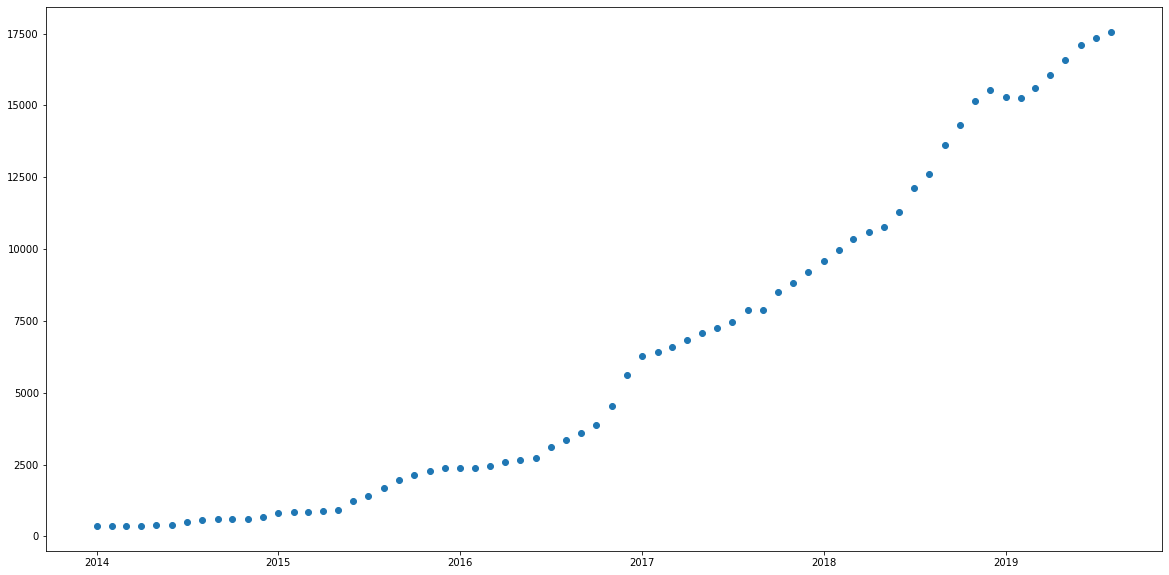

In [42]:
plt.figure(figsize=(20,10))
plt.plot(X, y, 'o')
#plt.xticks(tr['actual']) <- 이거는 너무 더러움....

In [43]:
#plt.scatter(X, y, color='green', s=30)

Text(0, 0.5, 'Vehicle Sales')

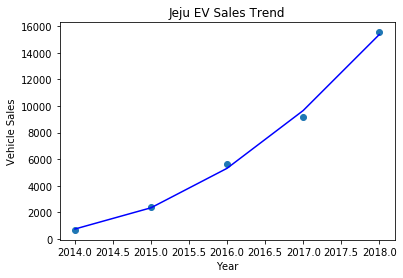

In [59]:
pred = lin_reg_2.predict(x_poly)
plt.plot(X, y,'o')
#plt.scatter(X, y, color='green')
plt.plot(X, pred, color= 'blue')
plt.title('Jeju EV Sales Trend')
plt.xlabel('Year')
plt.ylabel('Vehicle Sales')

In [60]:
import numpy as np

In [61]:
year_dat = np.arange(2019, 2035)
print(year_dat)
newdata = pd.DataFrame( {'year':year_dat} )
# newdata = pd.DataFrame( {'year':[9, 10, 11,12,13,14,15,16, 17, 18, 19, 20]} )
x_poly_new = model.fit_transform(newdata)
newdata

[2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032
 2033 2034]


,year
0,2019
1,2020
2,2021
3,2022
4,2023
5,2024
6,2025
7,2026
8,2027
9,2028


In [62]:
pred_new = lin_reg_2.predict(x_poly_new)
pred_new
#여기서 예측할 때에는 각 달별이 아니라 그냥 각 year의 데이터로 뽑음
#처음 위에 dot graph는 다른 파일 사용 

array([ 22468.00000286,  30933.20000601,  40771.68572426,  51983.45715761,
        64568.51430655,  78526.85717058,  93858.48574972, 110563.40004444,
       128641.60005426, 148093.08577919, 168917.85721922, 191115.91437483,
       214687.25724554, 239631.88583136, 265949.80013275, 293641.00014925])

Text(0, 0.5, 'Vehicle')

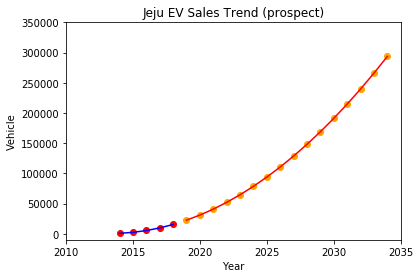

In [65]:
plt.scatter(X, y, color='red')
plt.scatter(newdata, pred_new, color='orange')  # 예측

plt.plot(X, pred, color= 'blue')
plt.plot(newdata, pred_new, color= 'red')         # 예측

plt.xlim(2010, 2035)
plt.ylim(-10000, 350000)
plt.title('Jeju EV Sales Trend (prospect)')
plt.xlabel('Year')
plt.ylabel('Vehicle')


In [66]:
sub = pd.read_excel("./data/project/sub_j.xlsx")

In [67]:
sub['vehicle'] = pred_new

In [68]:
sub.to_excel("trial_last_0917_jeju.xlsx", index=False)